In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
samples = 1000
X, y = make_circles(samples, noise = 0.03, random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)

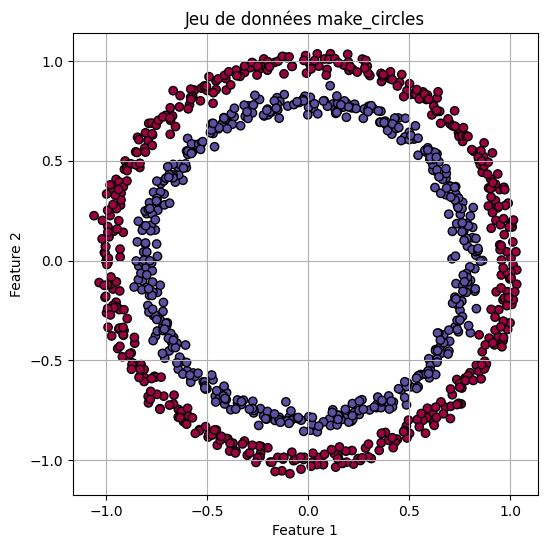

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
plt.title("Jeu de données make_circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

sequential_model_SGD = tf.keras.models.Sequential(
    [
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

sequential_model_SGD.compile(
            optimizer='SGD',
            loss='binary_crossentropy',
            metrics=['accuracy']
            )

In [26]:
hist = sequential_model_SGD.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4663 - loss: 0.6949 
Test accuracy: 0.49


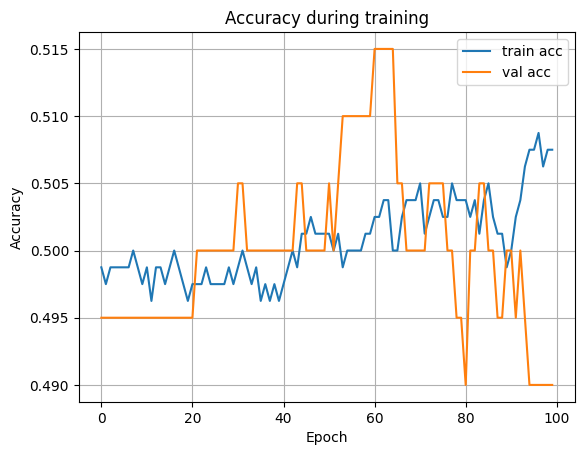

In [27]:
# 6. Evaluate the Model
loss, accuracy = sequential_model_SGD.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# 7. Plot training history
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Accuracy Pas terrible (autour de 0.5)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9973 - loss: 0.0054 
Test accuracy: 1.00


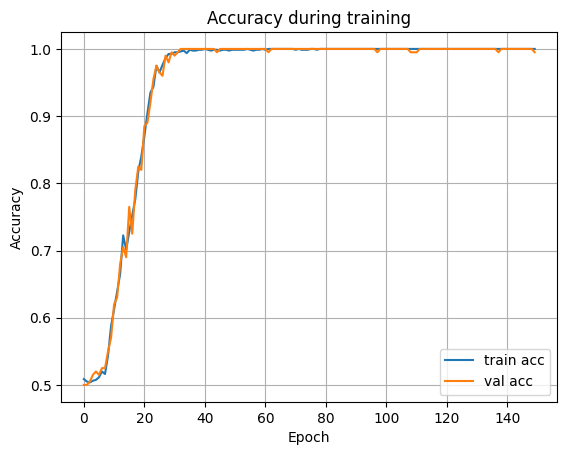

In [97]:
# Improve model, more Layers and neurons

sequential_model_Adam = tf.keras.models.Sequential(
    [
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(8, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

sequential_model_Adam.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
            )

hist = sequential_model_Adam.fit(X_train, y_train, epochs=150, verbose=0, validation_data=(X_test, y_test))

# 6. Evaluate the Model
loss, accuracy = sequential_model_Adam.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# 7. Plot training history
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
y_pred_prob = sequential_model_Adam.predict(X_test)
y_pred = (y_pred_prob > 0.95).astype(int)

print("Vraies classes      :", y_test[:10].flatten())
print("Prédictions (proba) :", np.round(y_pred_prob[:10].flatten(), 2))
print("Prédictions (0/1)   :", y_pred[:10].flatten())



print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Vraies classes      : [1 1 1 1 0 0 0 1 0 0]
Prédictions (proba) : [1. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
Prédictions (0/1)   : [1 1 1 1 0 0 0 1 0 0]
Matrice de confusion :
[[103   0]
 [  0  97]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        97

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [32]:

def plot_decision_boundary(model, X, y):
    # Crée un maillage (grille de points)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01  # taille des pas dans la grille

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Prédiction sur chaque point de la grille
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = (Z > 0.5).astype(int)  # conversion en classes 0 ou 1
    Z = Z.reshape(xx.shape)

    # Tracer la frontière
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.7)

    # Tracer les vrais points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.show()

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


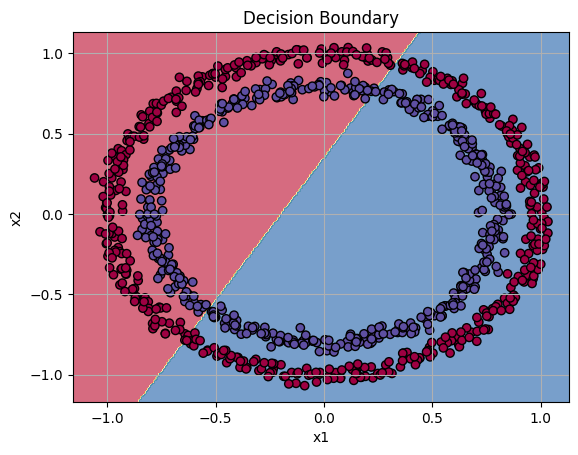

In [34]:
plot_decision_boundary(sequential_model_SGD, X, y)

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step


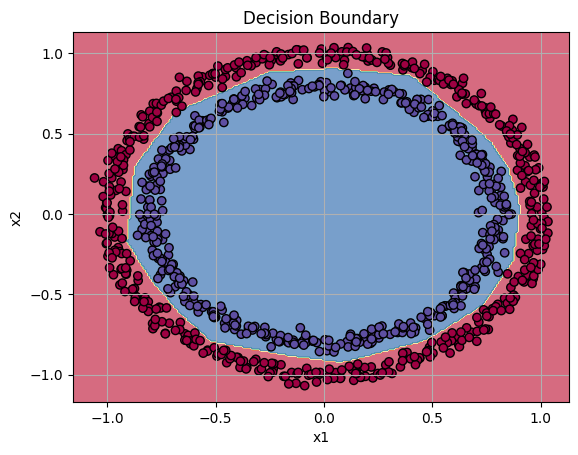

In [99]:
plot_decision_boundary(sequential_model_Adam, X, y)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0827 
Test accuracy: 1.00


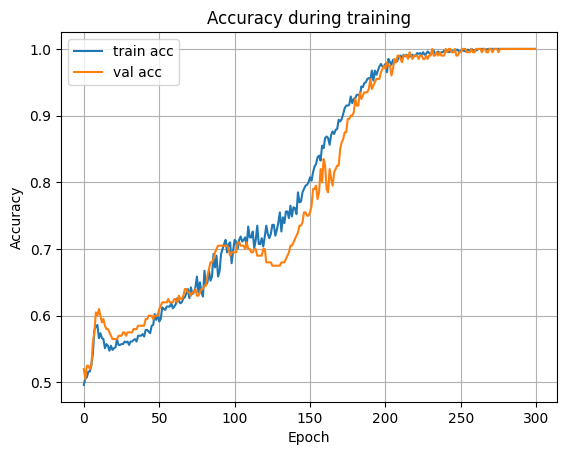

In [39]:
# Improve model, more Layers and neurons

sequential_model_SGD_2 = tf.keras.models.Sequential(
    [
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

sequential_model_SGD_2.compile(
            optimizer='SGD',
            loss='binary_crossentropy',
            metrics=['accuracy']
            )

hist = sequential_model_SGD_2.fit(X_train, y_train, epochs=300, verbose=0, validation_data=(X_test, y_test))

# 6. Evaluate the Model
loss, accuracy = sequential_model_SGD_2.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# 7. Plot training history
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


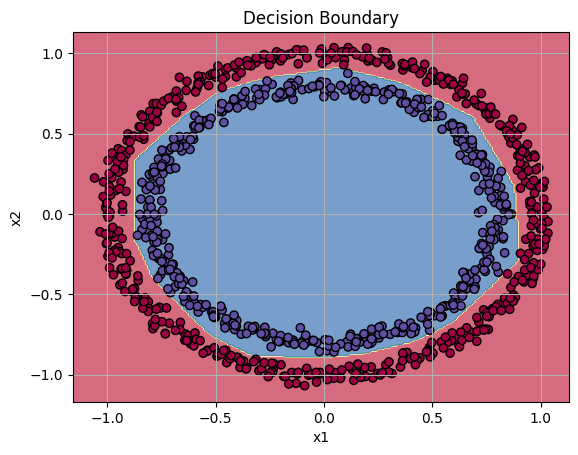

In [40]:
plot_decision_boundary(sequential_model_SGD_2, X, y)

C'EST PARTI POUR LES OPTIMISATIONS

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0307 
Test accuracy: 1.00


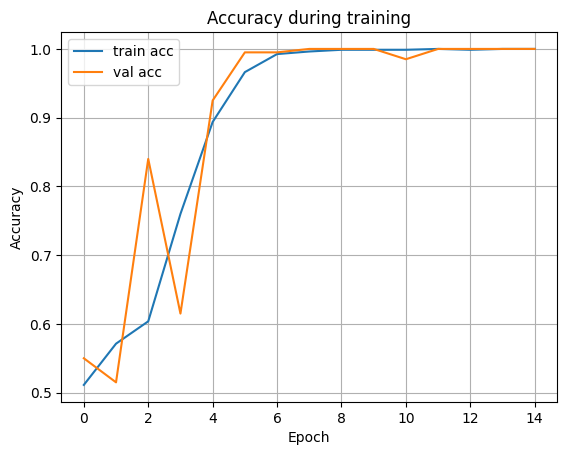

In [87]:
sequential_model_Adam_opt = tf.keras.models.Sequential(
    [
    tf.keras.Input(shape=(2, )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

sequential_model_Adam_opt.compile(
            tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.75),
            loss='binary_crossentropy',
            metrics=['accuracy']
            )

hist = sequential_model_Adam_opt.fit(X_train, y_train, epochs=15, verbose=0, validation_data=(X_test, y_test))

# 6. Evaluate the Model
loss, accuracy = sequential_model_Adam_opt.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# 7. Plot training history
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
y_pred_prob = sequential_model_Adam.predict(X_test)
y_pred = (y_pred_prob > 0.95).astype(int)

print("Vraies classes      :", y_test[:10].flatten())
print("Prédictions (proba) :", np.round(y_pred_prob[:10].flatten(), 2))
print("Prédictions (0/1)   :", y_pred[:10].flatten())



print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Vraies classes      : [1 1 1 1 0 0 0 1 0 0]
Prédictions (proba) : [0.84 0.84 0.84 0.84 0.84 0.61 0.84 0.84 0.84 0.37]
Prédictions (0/1)   : [0 0 0 0 0 0 0 0 0 0]
Matrice de confusion :
[[103   0]
 [ 97   0]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       103
           1       0.00      0.00      0.00        97

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.35       200



c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


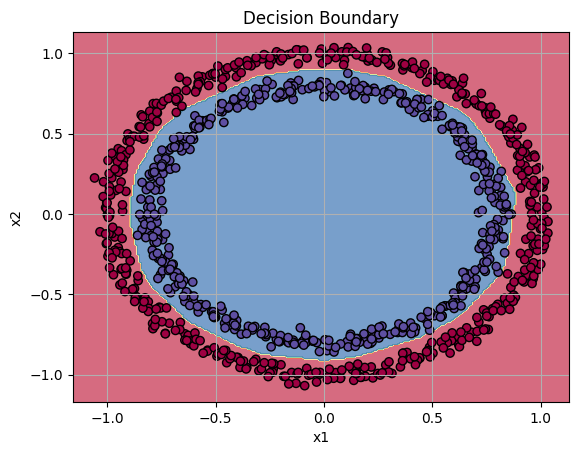

In [70]:
plot_decision_boundary(sequential_model_Adam_opt, X, y)

Construire un modèle de réseau de neurones avec plusieurs couches et neurones permet d’apprendre des représentations complexes, améliorant la capacité de classification.
Mesurer la loss et l’accuracy sur des données de test permet de quantifier la qualité du modèle. Visualiser la frontière de décision offre une intuition visuelle forte sur le comportement du modèle.
Améliorer un modèle est un processus itératif : tester différentes architectures, hyperparamètres et méthodes, puis comparer les résultats visuellement et quantitativement.
Choisir un optimiseur adapté (comme Adam), régler le taux d’apprentissage (learning_rate), et ajuster des paramètres comme beta_1 influencent fortement la convergence et la performance du modèle.